In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
banks = pd.read_csv('Desktop/banks.csv')
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 12 columns):
Financial Institution Number    2883 non-null float64
Institution Name                3484 non-null object
Institution Type                3484 non-null object
Charter Type                    3484 non-null object
Headquarters                    3484 non-null object
Failure Date                    3484 non-null object
Insurance Fund                  3484 non-null object
Certificate Number              2999 non-null float64
Transaction Type                3484 non-null object
Total Deposits                  3484 non-null int64
Total Assets                    3333 non-null float64
Estimated Loss (2015)           2509 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 326.7+ KB


In [16]:
print(banks)

      Financial Institution Number  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                              NaN   
5                              NaN   
6                              NaN   
7                              NaN   
8                              NaN   
9                              NaN   
10                             NaN   
11                             NaN   
12                             NaN   
13                             NaN   
14                             NaN   
15                             NaN   
16                             NaN   
17                             NaN   
18                             NaN   
19                             NaN   
20                             NaN   
21                             NaN   
22                             NaN   
23                             NaN   
24                             NaN   
25          

In [17]:
banks.head()

,Financial Institution Number,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss (2015)
0,NaN,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,"PITTSBURGH, PA",4/19/1934,FDIC,NaN,PAYOUT,1064,1435.0,NaN
1,NaN,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,"EAST PEORIA, IL",5/28/1934,FDIC,NaN,PAYOUT,238,374.0,NaN
2,NaN,FIRST NATIONAL BANK OF LIMA,COMMERCIAL BANK,FEDERAL,"LIMA, MT",7/18/1934,FDIC,NaN,PAYOUT,42,91.0,NaN
3,NaN,FLORENCE DEPOSIT BANK,COMMERCIAL BANK,STATE,"FLORENCE, IN",7/18/1934,FDIC,NaN,PAYOUT,69,105.0,NaN
4,NaN,BANK OF LEWISPORT,COMMERCIAL BANK,STATE,"LEWISPORT, KY",8/6/1934,FDIC,NaN,PAYOUT,68,81.0,NaN


In [18]:
banks.isnull().sum()

Financial Institution Number    601
Institution Name                  0
Institution Type                  0
Charter Type                      0
Headquarters                      0
Failure Date                      0
Insurance Fund                    0
Certificate Number              485
Transaction Type                  0
Total Deposits                    0
Total Assets                    151
Estimated Loss (2015)           975
dtype: int64

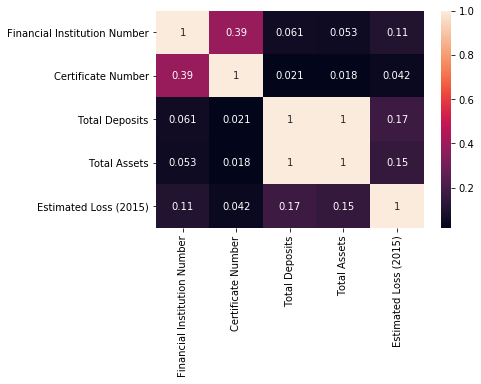

In [19]:
corr = banks[banks.columns].corr()
sns.heatmap(corr, annot = True)

In [20]:
banks.get('Institution Type').unique()

array(['COMMERCIAL BANK', 'SAVINGS BANK', 'SAVINGS ASSOCIATION'], dtype=object)

In [21]:
banks.get('Transaction Type').unique()

array(['PAYOUT', 'ACQUISITION', 'PRIVATIZATION', 'TRANSFER', 'MANAGEMENT'], dtype=object)

In [22]:
banks.get('Charter Type').unique()

array(['STATE', 'FEDERAL', 'FEDERAL/STATE'], dtype=object)

In [23]:
banks.get('Insurance Fund').unique()

array(['FDIC', 'FSLIC', 'RTC', 'BIF', 'SAIF', 'DIF'], dtype=object)

In [24]:
banks['liquidity'] = banks['Total Deposits']/banks['Total Assets'] * 100

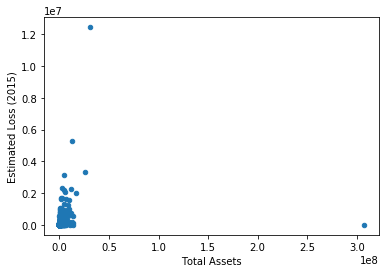

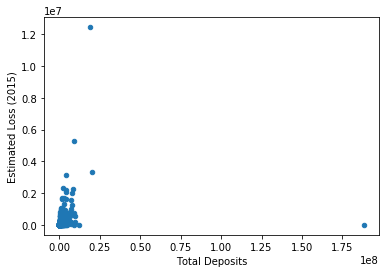

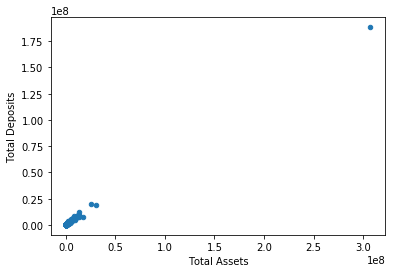

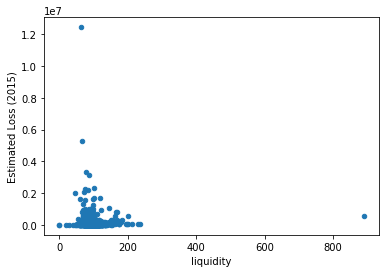

In [25]:
banks.plot.scatter(x = 'Total Assets', y = 'Estimated Loss (2015)')
banks.plot.scatter(x = 'Total Deposits', y = 'Estimated Loss (2015)')
banks.plot.scatter(x = 'Total Assets', y = 'Total Deposits')
banks.plot.scatter(x = 'liquidity', y = 'Estimated Loss (2015)')

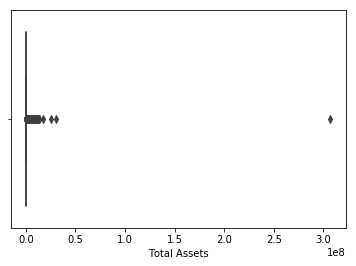

In [34]:
#fiddle with this soe more
sns.boxplot(x = banks['Total Assets'])

In [35]:
#Analytic question Which commercial bank failure cost the federal government the most(in terms of money and time) to resolve?
banks.columns

Index(['Financial Institution Number', 'Institution Name', 'Institution Type',
       'Charter Type', 'Headquarters', 'Failure Date', 'Insurance Fund',
       'Certificate Number', 'Transaction Type', 'Total Deposits',
       'Total Assets', 'Estimated Loss (2015)', 'liquidity'],
      dtype='object')

In [37]:
banks_sorted=banks.sort_values(by='Estimated Loss (2015)', ascending=False)
banks_sorted.head()

,Financial Institution Number,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss (2015),liquidity
2970,10007.0,INDYMAC BANK F.S.B,SAVINGS BANK,STATE,"PASADENA, CA",7/11/2008,DIF,29730.0,ACQUISITION,18941727,30698512.0,12438005.0,61.702427
3024,10061.0,"BANKUNITED, FSB",SAVINGS BANK,STATE,"CORAL GABLES, FL",5/21/2009,DIF,32247.0,ACQUISITION,8775985,13111463.0,5274515.0,66.933682
3063,10103.0,COLONIAL BANK,COMMERCIAL BANK,STATE,"MONTGOMERY, AL",8/14/2009,DIF,9609.0,ACQUISITION,20072099,25455112.0,3330263.0,78.852920
1773,7283.0,LINCOLN SAVINGS & LOAN,SAVINGS ASSOCIATION,FEDERAL/STATE,"IRVINE, CA",4/14/1989,RTC,29642.0,ACQUISITION,4193981,4857204.0,3142552.0,86.345581
2631,1299.0,OAKTREE FEDERAL SAVINGS,SAVINGS ASSOCIATION,FEDERAL/STATE,"NEW ORLEANS, LA",10/13/1991,RTC,32090.0,ACQUISITION,2256189,2214549.0,2345947.0,101.880293


In [44]:
banks['Failure Date']=pd.to_datetime(banks['Failure Date'],infer_datetime_format=True)

In [49]:
banks['Failure Year']=banks['Failure Date'].apply(lambda x: x.year)

In [50]:
banks['Failure Year']

0       1934
1       1934
2       1934
3       1934
4       1934
5       1934
6       1934
7       1934
8       1934
9       1935
10      1935
11      1935
12      1935
13      1935
14      1935
15      1935
16      1935
17      1935
18      1935
19      1935
20      1935
21      1935
22      1935
23      1935
24      1935
25      1935
26      1935
27      1935
28      1935
29      1935
        ... 
3454    2014
3455    2014
3456    2014
3457    2014
3458    2014
3459    2014
3460    2014
3461    2014
3462    2014
3463    2014
3464    2014
3465    2014
3466    2014
3467    2014
3468    2014
3469    2014
3470    2015
3471    2015
3472    2015
3473    2015
3474    2015
3475    2015
3476    2015
3477    2016
3478    2016
3479    2016
3480    2016
3481    2016
3482    2017
3483    2017
Name: Failure Year, Length: 3484, dtype: int64

In [51]:
infer_datetime_format=True

In [58]:
banks_failuredate=banks.groupby('Failure Year', as_index=False)['Failure Date'].agg('count')

[Text(0,0,'1934'),
 Text(0,0,'1935'),
 Text(0,0,'1936'),
 Text(0,0,'1937'),
 Text(0,0,'1938'),
 Text(0,0,'1939'),
 Text(0,0,'1940'),
 Text(0,0,'1941'),
 Text(0,0,'1942'),
 Text(0,0,'1943'),
 Text(0,0,'1944'),
 Text(0,0,'1945'),
 Text(0,0,'1946'),
 Text(0,0,'1947'),
 Text(0,0,'1948'),
 Text(0,0,'1949'),
 Text(0,0,'1950'),
 Text(0,0,'1951'),
 Text(0,0,'1952'),
 Text(0,0,'1953'),
 Text(0,0,'1954'),
 Text(0,0,'1955'),
 Text(0,0,'1956'),
 Text(0,0,'1957'),
 Text(0,0,'1958'),
 Text(0,0,'1959'),
 Text(0,0,'1960'),
 Text(0,0,'1961'),
 Text(0,0,'1962'),
 Text(0,0,'1963'),
 Text(0,0,'1964'),
 Text(0,0,'1965'),
 Text(0,0,'1966'),
 Text(0,0,'1967'),
 Text(0,0,'1968'),
 Text(0,0,'1969'),
 Text(0,0,'1970'),
 Text(0,0,'1971'),
 Text(0,0,'1972'),
 Text(0,0,'1973'),
 Text(0,0,'1974'),
 Text(0,0,'1975'),
 Text(0,0,'1976'),
 Text(0,0,'1977'),
 Text(0,0,'1978'),
 Text(0,0,'1979'),
 Text(0,0,'1980'),
 Text(0,0,'1981'),
 Text(0,0,'1982'),
 Text(0,0,'1983'),
 Text(0,0,'1984'),
 Text(0,0,'1985'),
 Text(0,0,'1

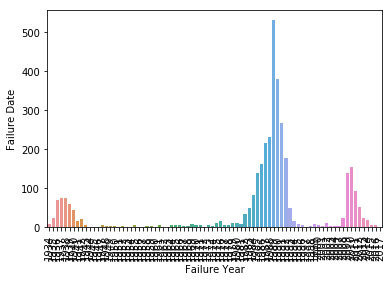

In [65]:
g=sns.barplot(x=banks_failuredate['Failure Year'],y = banks_failuredate['Failure Date'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [66]:
HQ[:10].pplot(kind='bar')

NameError: name 'HQ' is not defined

In [ ]:
#Analytic question What type of banking institution is the most likely to fail? 
#Analytic question How have bank failure rates changed over time? 